In [250]:
import pandas as pd
import numpy as np
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing, cluster)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle
from scipy import stats
import sys
from numpy import unique
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.mixture import BayesianGaussianMixture

sys.path.insert(0, '../Service/')

from DataPreprocessingService import *
seed = 42
np.random.seed(seed)

# Data acquisiton

Due to the unavailability of such data in regards to code analysis, the data was acquired through an ETL (Extract, Transform & Load) process. The repositories used are open source code and were found on GitHub. A list of all the repositories can be found in the Appendix H.

In [251]:
dataframe = pd.read_csv("../Data/data_v2.csv")

In [252]:
dataframe

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


In [253]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project_ID               600 non-null    object 
 1   Project_Name             600 non-null    object 
 2   EndOfLifeFramework       600 non-null    float64
 3   ForFrequency             600 non-null    float64
 4   IfFrequency              600 non-null    float64
 5   ForEachFrequency         600 non-null    float64
 6   WhileFrequency           600 non-null    float64
 7   CodeLines                600 non-null    float64
 8   CommentLines             600 non-null    float64
 9   MethodNumber             600 non-null    float64
 10  ClassNumber              600 non-null    float64
 11  InterfaceNumber          600 non-null    float64
 12  InheritanceDeclarations  600 non-null    float64
 13  ExternalAPICalls         600 non-null    object 
 14  HttpClientCalls          6

In [254]:
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,4,35,763,79,16,23111,3934,676,328,15,176,1899,883,256
std,8,170,2892,269,63,85410,14324,2017,829,37,504,45640,2405,603
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34
50%,1,0,67,7,1,3826,254,104,86,4,40,0,254,84
75%,5,6,260,34,5,12104,1542,352,236,11,119,2,699,214
max,66,2135,35665,2802,758,1498515,211030,26617,11528,380,7926,1117948,31518,8452


Removing duplicates that could be present from the ETL process. This was done before any exploration to prevent errors from ocurring.

-> No duplicates found

In [255]:
dataframe.drop_duplicates(subset=dataframe.loc[:, dataframe.columns != 'Project_ID'])

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


# Data Exploration

Working on copies of the data to keep the original data intact

In [256]:
dfcopy = dataframe.copy()

Exploration by getting the max global boundaries of the list columns

In [257]:
class_coupling_listing_binning = global_boundaries(dfcopy['ClassCouplingListing'])
code_similarity_binning = global_boundaries(dfcopy['CodeSimilarity'])
code_lines_per_file_binning = global_boundaries(dfcopy['CodeLinesPerFile'])
comment_lines_per_file_binning = global_boundaries(dfcopy['CommentLinesPerFile'])

print("ClassCouplingListing " + repr(class_coupling_listing_binning))
print("CodeSimilarity " + repr(code_similarity_binning))
print("CodeLinesPerFile " + repr(code_lines_per_file_binning))
print("CommentLinesPerFile " + repr(comment_lines_per_file_binning))

ClassCouplingListing (6857, 0)
CodeSimilarity (100, 0)
CodeLinesPerFile (203174, 0)
CommentLinesPerFile (47801, 0)


It can be seen that there are some outliers, for instance CodeLinesPerFile: 203174

In [258]:
def get_boundaries(lower, higher, numberOfBins):
    boundaries = np.linspace(lower, higher, numberOfBins)
    boundaries[-1] = np.inf
    return boundaries

For CodeSimilarity, ClassCouplingListing, CodeLinesPerFile and CommentLinesPerFile, bins were made, the last bin contains all values between the previous and infinity such that all data is grouped 

In [259]:
def boundaries_splitting(column, boundaries, column_name):
    column = handle_column_data(column)
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy[bin_name] = column.apply(
            lambda x: sum(boundaries[i] <= value < boundaries[i + 1] for value in np.atleast_1d(x)))

def drop_boundaries_splitting(column, boundaries, column_name):
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy.drop(bin_name, axis=1, inplace=True)

In [260]:
class_coupling_listing_boundaries

array([6857.  , 5142.75, 3428.5 , 1714.25,     inf])

In [261]:
class_coupling_listing_boundaries = get_boundaries(class_coupling_listing_binning[0], class_coupling_listing_binning[1], 5)
code_similarity_boundaries = get_boundaries(code_similarity_binning[0], code_similarity_binning[1], 5)
code_lines_per_file_boundaries = get_boundaries(code_lines_per_file_binning[0], code_lines_per_file_binning[1], 5)
comment_lines_per_file_boundaries = get_boundaries(comment_lines_per_file_binning[0], comment_lines_per_file_binning[1], 5)

boundaries_splitting(dfcopy['ClassCouplingListing'], class_coupling_listing_boundaries, 'ClassCouplingListing')
boundaries_splitting(dfcopy['CodeSimilarity'], code_similarity_boundaries, 'CodeSimilarity')
boundaries_splitting(dfcopy['CodeLinesPerFile'], code_lines_per_file_boundaries, 'CodeLinesPerFile')
boundaries_splitting(dfcopy['CommentLinesPerFile'], comment_lines_per_file_boundaries, 'CommentLinesPerFile')


In [262]:
dfcopy

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,CodeSimilarity_50.0_25.0,CodeSimilarity_25.0_inf,CodeLinesPerFile_203174.0_152380.5,CodeLinesPerFile_152380.5_101587.0,CodeLinesPerFile_101587.0_50793.5,CodeLinesPerFile_50793.5_inf,CommentLinesPerFile_47801.0_35850.75,CommentLinesPerFile_35850.75_23900.5,CommentLinesPerFile_23900.5_11950.25,CommentLinesPerFile_11950.25_inf
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,365,0,0,0,0,0,0,0,0
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,0,96,0,0,0,0,0,0,0,0
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,0,71,0,0,0,0,0,0,0,0
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,0,890,0,0,0,0,0,0,0,0
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,0,109,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,0,301,0,0,0,0,0,0,0,0
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,9,0,0,0,0,0,0,0,0
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,0,39,0,0,0,0,0,0,0,0
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,5,0,0,0,0,0,0,0,0


Binning was a technique tried at the beginning for data preprocessing, but did not prove to be that efficient like other techniques. We decided to drop the bin columns.

In [263]:
drop_boundaries_splitting(dfcopy['ClassCouplingListing'], class_coupling_listing_boundaries, 'ClassCouplingListing')
drop_boundaries_splitting(dfcopy['CodeSimilarity'], code_similarity_boundaries, 'CodeSimilarity')
drop_boundaries_splitting(dfcopy['CodeLinesPerFile'], code_lines_per_file_boundaries, 'CodeLinesPerFile')
drop_boundaries_splitting(dfcopy['CommentLinesPerFile'], comment_lines_per_file_boundaries, 'CommentLinesPerFile')

In [264]:
dfcopy

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


For ExternalAPICalls json data for each row was extracted into simple lists

In [265]:
def extract_numbers_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))
        numbers = [value for value in data if isinstance(value, int)]
        return numbers
    
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

In [266]:
def global_boundaries_for_list(data):
    global_max = 0
    global_min = 9999

    for row in data:
        if len(row) != 0:
            row_max = np.max(row)
            row_min = np.min(row)
            if row_max > global_max:
                global_max = row_max
            if row_min < global_min:
                global_min = row_min

    return global_max, global_min

In [267]:
dfcopy['ExternalAPIExtracted'] = dfcopy['ExternalAPICalls'].apply(extract_numbers_from_json)
dfcopy

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,ExternalAPIExtracted
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0..."
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [268]:
val1, val2 = global_boundaries_for_list(dfcopy['ExternalAPIExtracted'])
print(f'{val1} {val2}')

7350 0


Instead of using binning, we decided to use median for the columns that had continous variables in order to bring the data closer to more discrete values

In [269]:
columns = ['CodeSimilarity', 'ClassCouplingListing', 'CodeLinesPerFile', 'CommentLinesPerFile', 'ExternalAPICalls']
dfcopy = handle_list_to_median(columns, dfcopy)

c:\Users\sgt\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sgt\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\sgt\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sgt\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [270]:
dfcopy.head(10)

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,ExternalAPIExtracted,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",11,8,82,1,0
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,6,22,0,0
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,8,28,0,0
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15,6,21,0,0
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,6,10,0,0
5,90f4b455-d48e-48d3-8129-0c3f9badcc67,afgalvan_Tilia,8,1,20,1,0,13534,44,248,...,"[29, 5, 42, 27, 27, 87, 40, 13, 11, 93, 66, 66...","[3, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ...","[87.38, 3.1, 1.45, 0.06, 0.49, 0.16, 0.15, 4.1...",209,"[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",13,5,24,0,0
6,ddfd0398-1f01-4631-80b9-ecfc1443de48,AhmedMoosa_CleanArchitecture-ASPNETCore,3,0,8,0,0,573,19,15,...,"[34, 18, 12, 12, 12, 12, 11, 12, 15, 20, 22, 2...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, ...","[9.12, 0.0, 12.68, 6.37, 8.05, 1.58, 1.04, 6.5...",20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,8,21,0,0
7,0d8a0485-2fc7-4368-8c98-5066f8b7ad7f,ahmettugur_MinimalApiCleanArchitecture,0,0,37,6,1,4543,20,123,...,"[37, 18, 52, 8, 69, 85, 26, 90, 7, 16, 6, 15, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.1, 16.68, 0.5, 0.0, 0.71, 1.37, 0.43, 1.38,...",146,"[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, ...",12,7,18,0,0
8,6379c58b-8ed4-4aa3-9da9-42e17b4c0bfa,aksharp_DDD.Light,21,0,54,0,2,3178,487,118,...,"[7, 10, 6, 46, 7, 69, 7, 13, 11, 7, 16, 9, 10,...","[0, 0, 0, 0, 7, 1, 7, 0, 0, 7, 0, 0, 0, 0, 0, ...","[8.66, 6.51, 9.24, 98.7, 4.14, 98.89, 12.05, 1...",139,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14,4,15,0,0
9,8ecf893e-f59b-4062-9ead-3b244f689949,alesimoes_hexagonal-clean-architecture,9,0,38,1,0,2780,33,90,...,"[11, 9, 6, 6, 27, 12, 9, 11, 24, 52, 35, 21, 1...","[0, 10, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,...","[96.61, 91.7, 95.3, 91.82, 89.5, 78.42, 0.29, ...",116,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,20,0,0


# Box plots after applying median

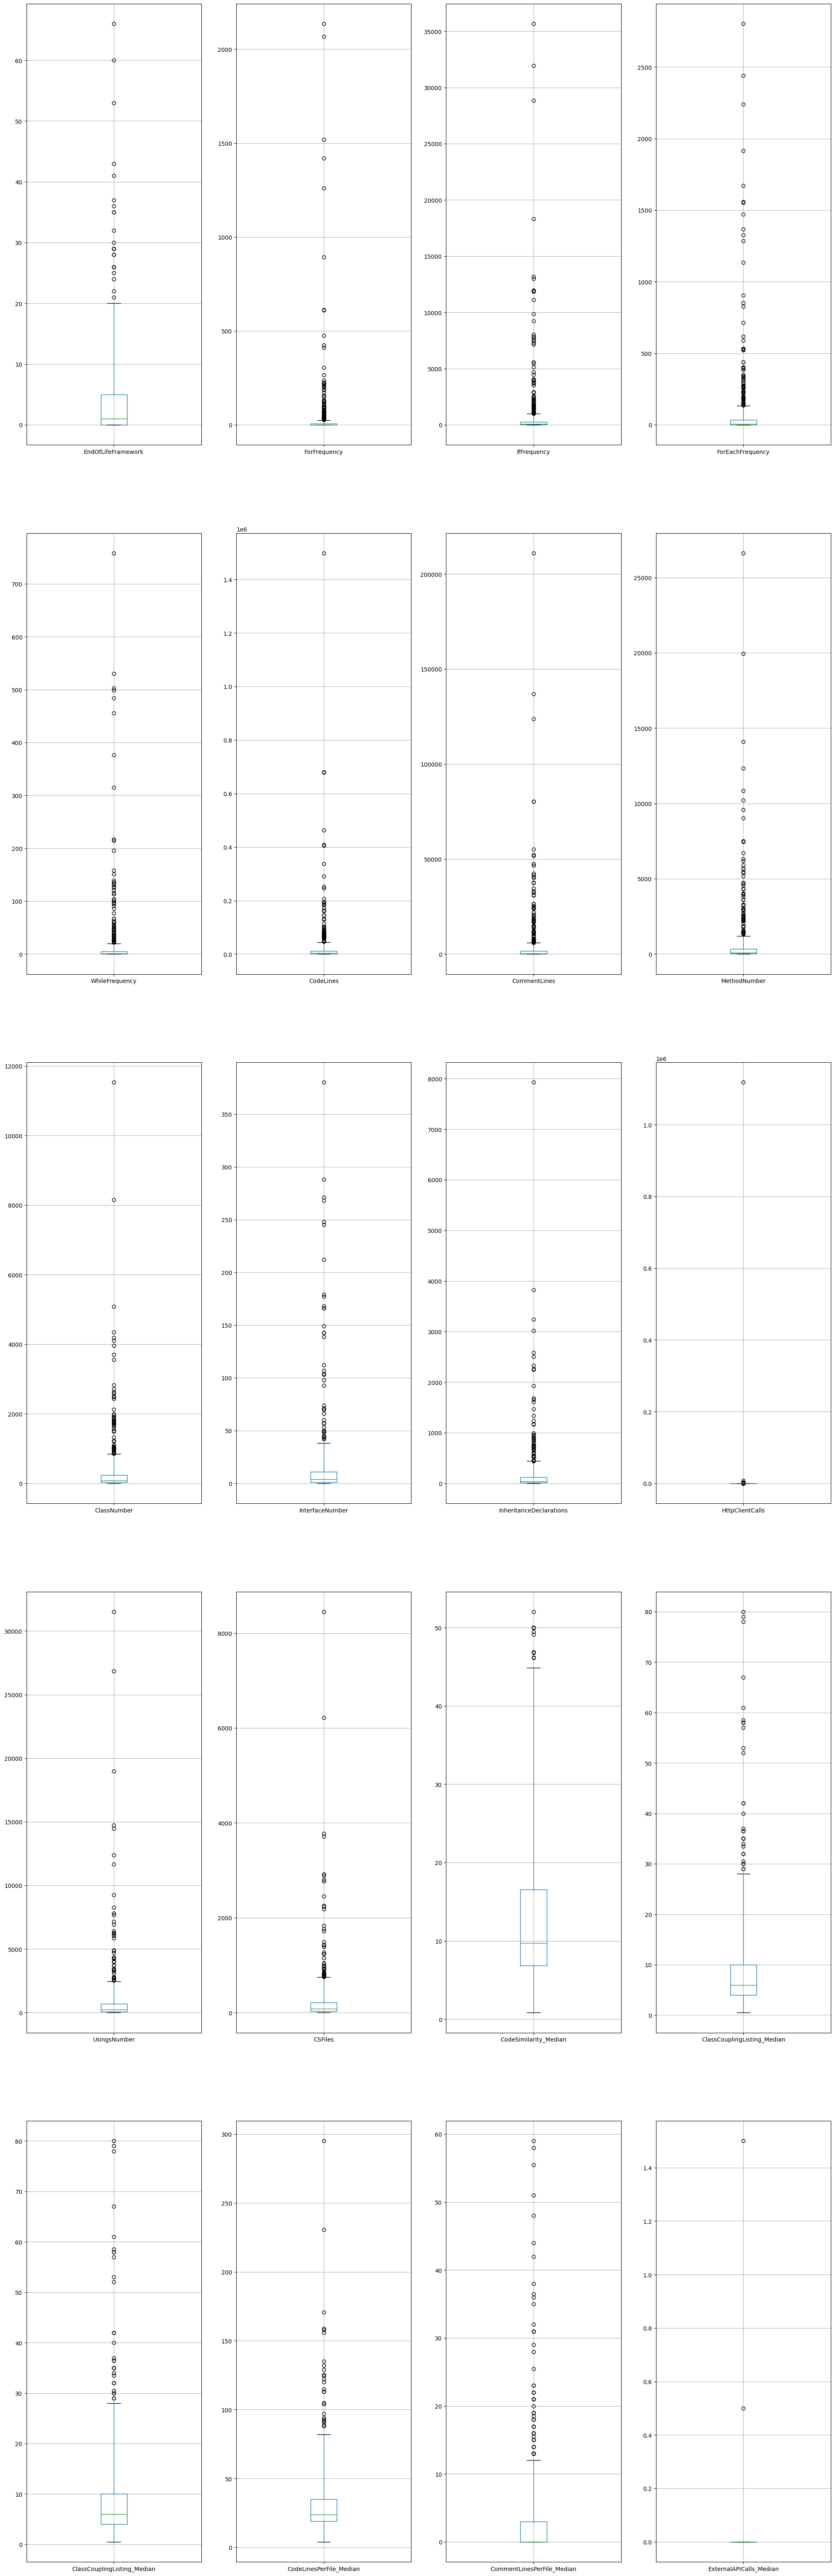

In [271]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+15], ax=axes[4][i], showfliers=True, whis=3)

Removing outliers where the difference between the outlier and median is higher than the standard deviation

In [272]:
columns = dfcopy.select_dtypes(include=np.number).columns
dfcopy = remove_outliers(columns, dfcopy)

Dropped irrelevant columns

In [273]:
dfcopy.drop(columns=['Project_Name','Project_ID','ClassCouplingListing', 'CodeSimilarity', 'ExternalAPICalls', 'ExternalAPIExtracted','CodeLinesPerFile','CommentLinesPerFile'], axis=1,inplace=True)

Multiple imputation with knn imputation to remove 0s

Imputing twice to account for nan's and 0's

In [275]:
imputed_nans = impute_nans(dfcopy)
imputed_nans.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,2,12,311,34,6,12381,1516,296,194,8,95,36,476,165,11,7,26,1,0
std,2,27,563,60,13,20019,2723,413,247,9,123,355,556,187,5,3,9,2,0
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1,1,0,4,0,0
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34,7,4,19,0,0
50%,1,0,67,7,1,3826,251,104,86,4,40,0,250,84,10,6,24,0,0
75%,3,6,248,32,5,12012,1506,351,232,11,119,2,666,214,15,8,32,3,0
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,0


Dropped 'ExternalAPICalls_Median' due to the mean, std, min and the rest being 0 (from the dataframe description above)

In [115]:
imputed_nans.drop('ExternalAPICalls_Median', inplace=True, axis=1)
dfcopy = impute_zero_values(imputed_nans)

In [116]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


# Box plots after data preprocessing

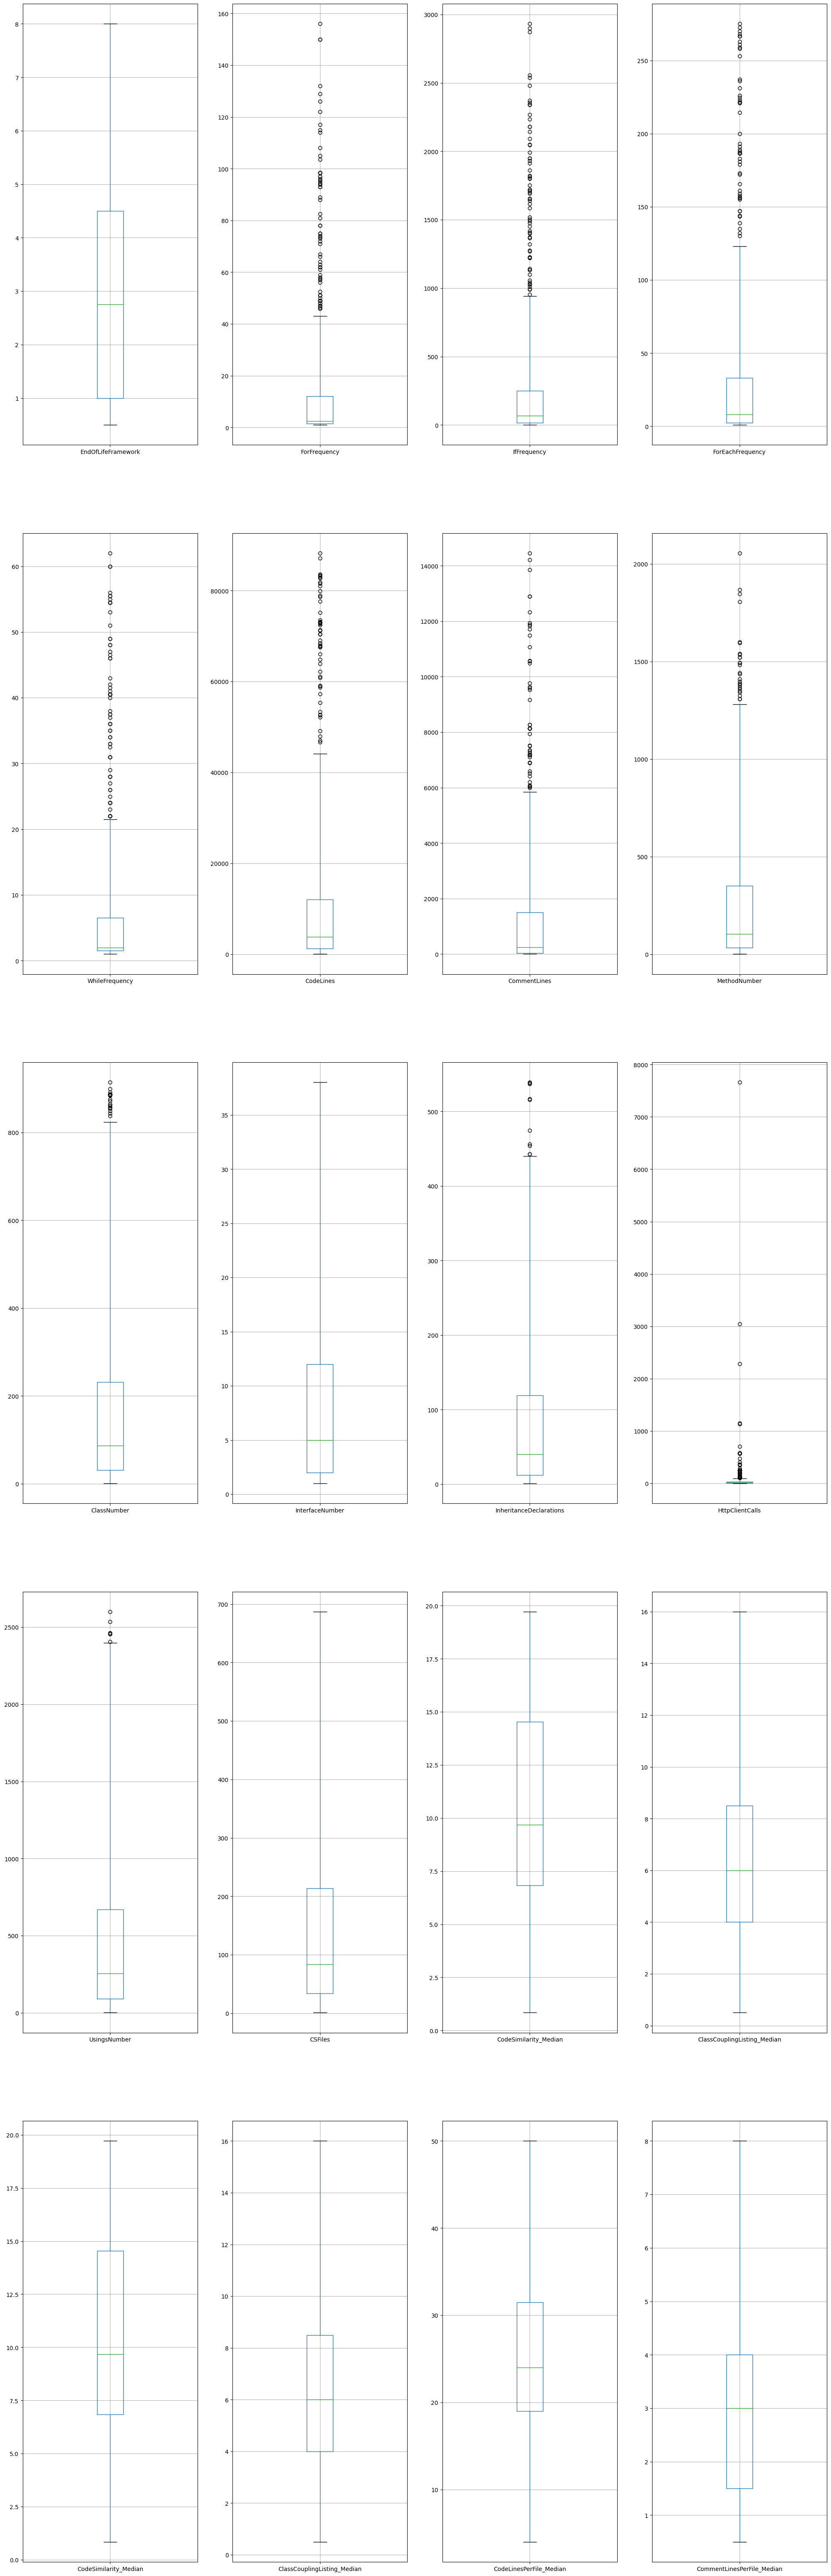

In [117]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+14], ax=axes[4][i], showfliers=True, whis=3)

In [118]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


Define methods for plotting histograms

In [119]:
def histograms(dfcopy):
    columns = dfcopy.select_dtypes(include=np.number).columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

    for i, column in enumerate(columns):
        row_index = i // 4
        col_index = i % 4
        axes[row_index, col_index].hist(dfcopy[column])
        axes[row_index, col_index].set_title(column)

    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Histograms before any kind of data transformation

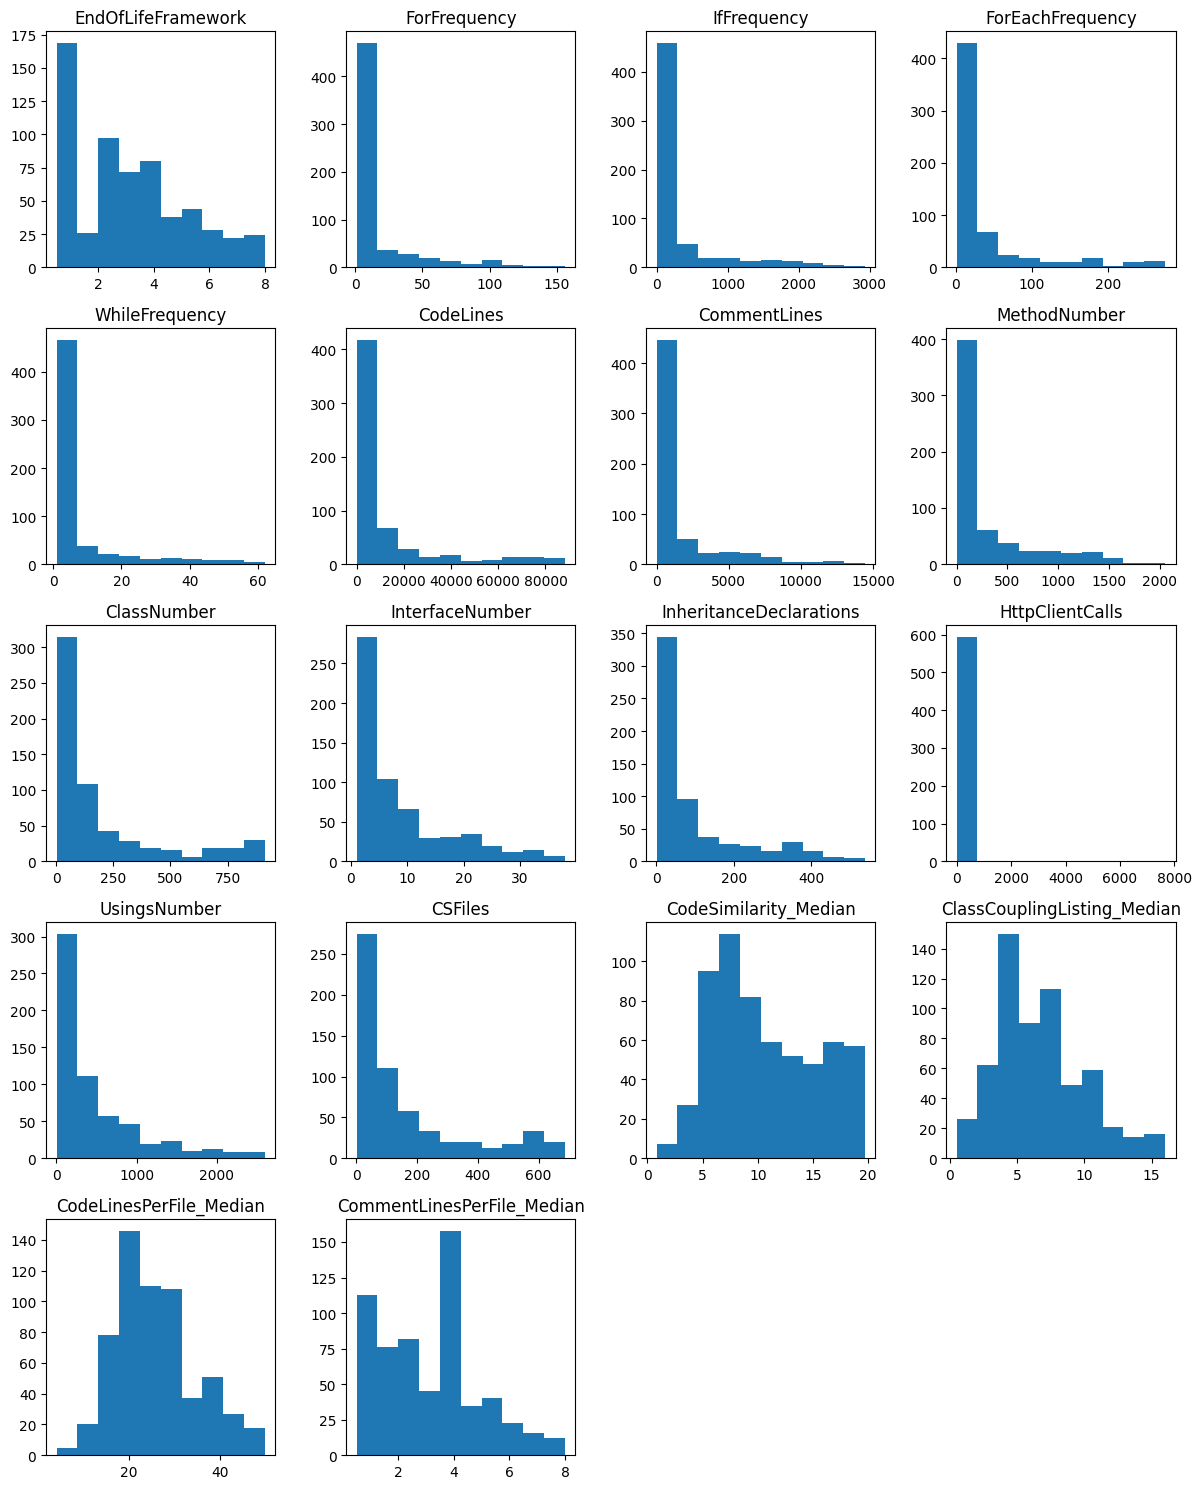

In [120]:
histograms(dfcopy)

Columns such as 'If', 'For', 'ForEach', 'While' frequency were summed up into one column called 'TermFrequency'

In [121]:
dfcopy = combine_term_frequency(dfcopy)

In [122]:
dfcopy.describe()

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,12381,1516,296,194,9,95,61,479,165,11,7,26,3,367
std,2,20019,2723,413,247,9,123,362,556,187,5,3,9,2,645
min,0,11,1,1,1,1,1,-1,1,1,1,0,4,0,5
25%,1,1237,44,34,31,2,12,4,91,34,7,4,19,2,23
50%,3,3826,251,104,86,5,40,13,254,84,10,6,24,3,88
75%,4,12012,1506,351,232,12,119,27,669,214,15,8,32,4,297
max,8,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,3354


# Histograms after 'TermFrequency' column was introduced

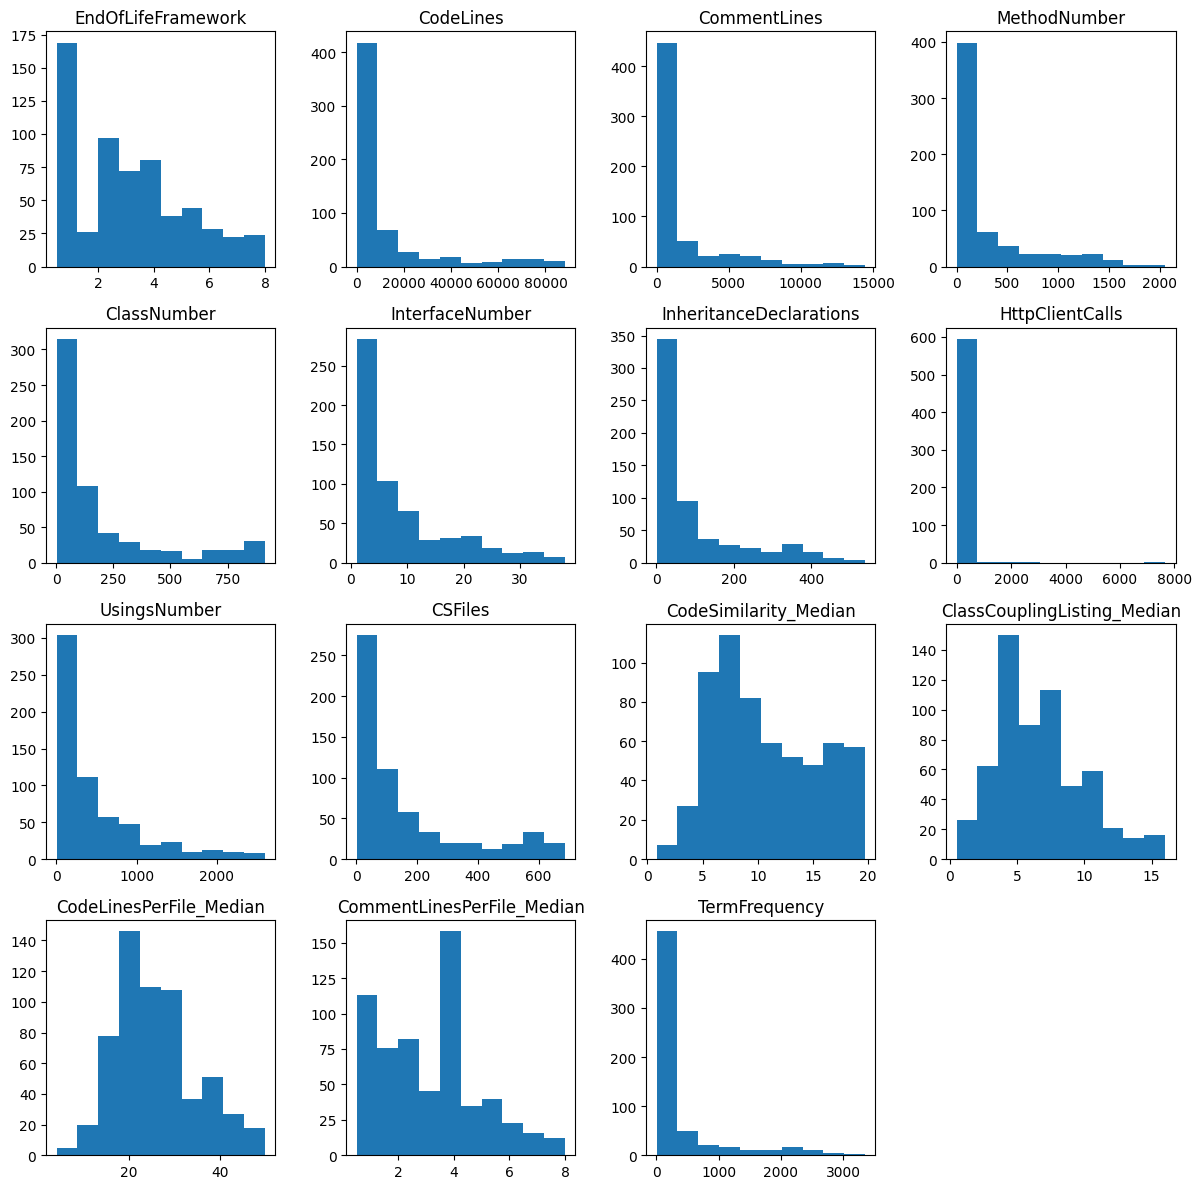

In [123]:
histograms(dfcopy)

# Data transformation

In [124]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CodeSimilarity_Median',
       'ClassCouplingListing_Median', 'CodeLinesPerFile_Median','CommentLinesPerFile_Median', 'TermFrequency','EndOfLifeFramework']
sqrt_columns(columns, dfcopy)

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Histograms after applying sqrt once

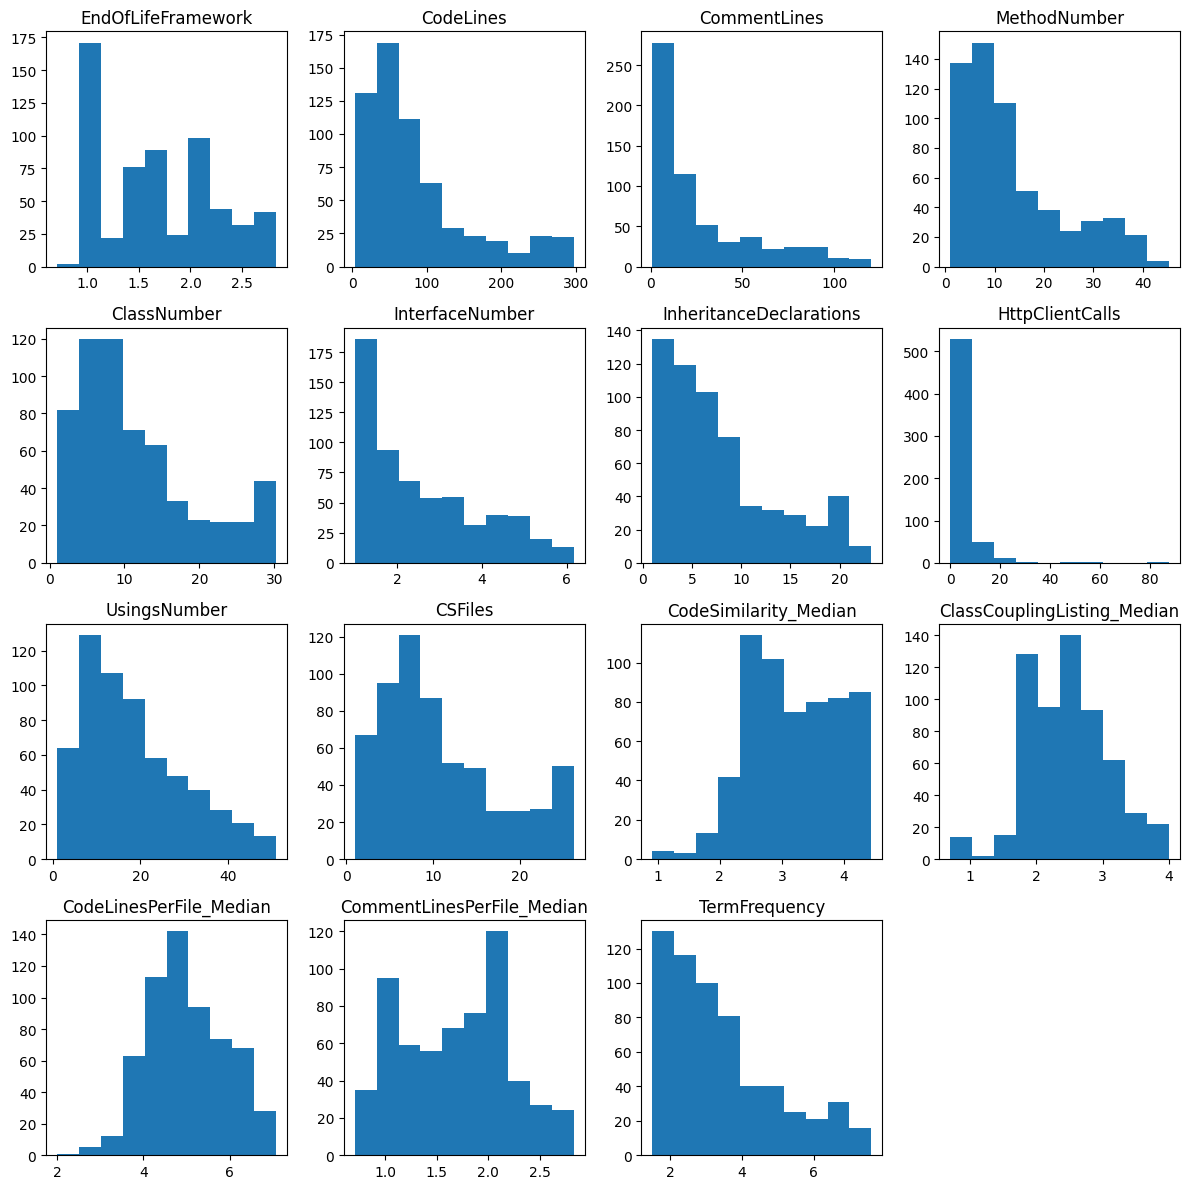

In [125]:
histograms(dfcopy)

Some of the columns are still right skewd, so we applied sqrt once more. It was considered to apply log as it would normally be done, but due to the vast number of 0s in the columns which are intrinsic to the data that we evaluate, we decided not to deal with any Infinity.

# Histograms after applying sqrt twice

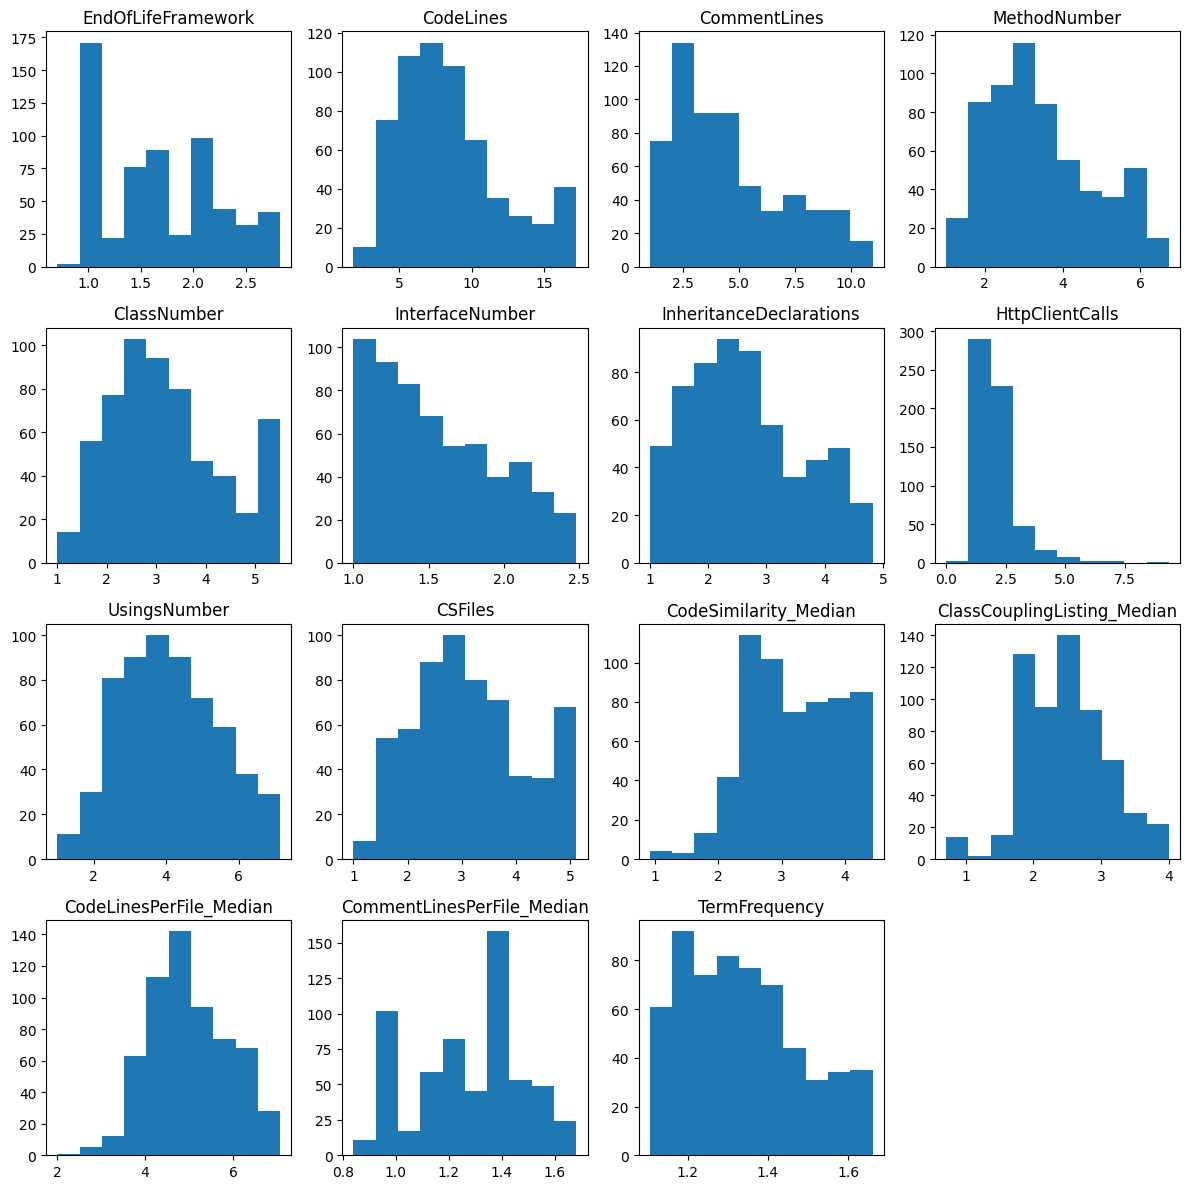

In [126]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CommentLinesPerFile_Median', 'TermFrequency']
sqrt_columns(columns, dfcopy)
histograms(dfcopy)

In [127]:
dfcopy = dfcopy.dropna()

Checking the variance of the columns

Initially when the data was split into boundaries, the variance was immensely higher with numbers reaching up to 37 - this was also one of the reasons why we switched to median

In [128]:
column_std = dfcopy.std()

sorted_columns = column_std.sort_values(ascending=False)

print(sorted_columns)

CodeLines                     4
CommentLines                  2
MethodNumber                  1
UsingsNumber                  1
ClassNumber                   1
CSFiles                       1
InheritanceDeclarations       1
HttpClientCalls               1
CodeLinesPerFile_Median       1
CodeSimilarity_Median         1
ClassCouplingListing_Median   1
EndOfLifeFramework            1
InterfaceNumber               0
CommentLinesPerFile_Median    0
TermFrequency                 0
dtype: float64


Applying KNN signal 

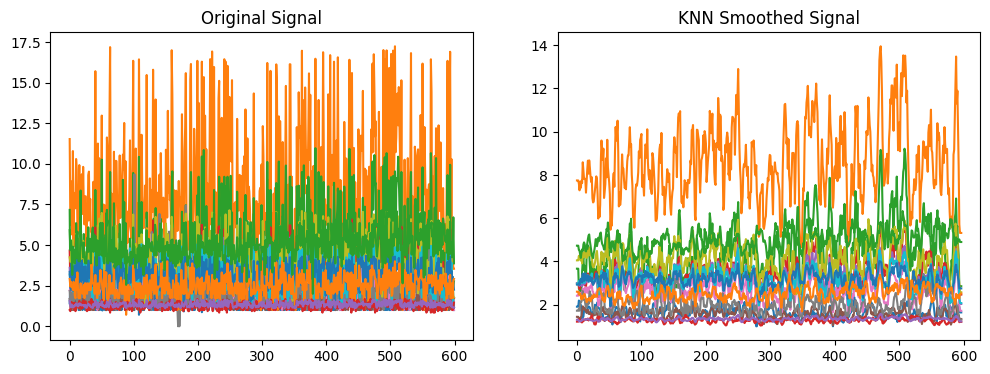

In [129]:
window_size_knn = 5

smoothed_signal_knn = knn_smoothing(dfcopy, window_size_knn)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dfcopy)
plt.title('Original Signal')

plt.subplot(1, 2, 2)
plt.plot(smoothed_signal_knn)
plt.title('KNN Smoothed Signal')

plt.show()

Checking the correlation between features

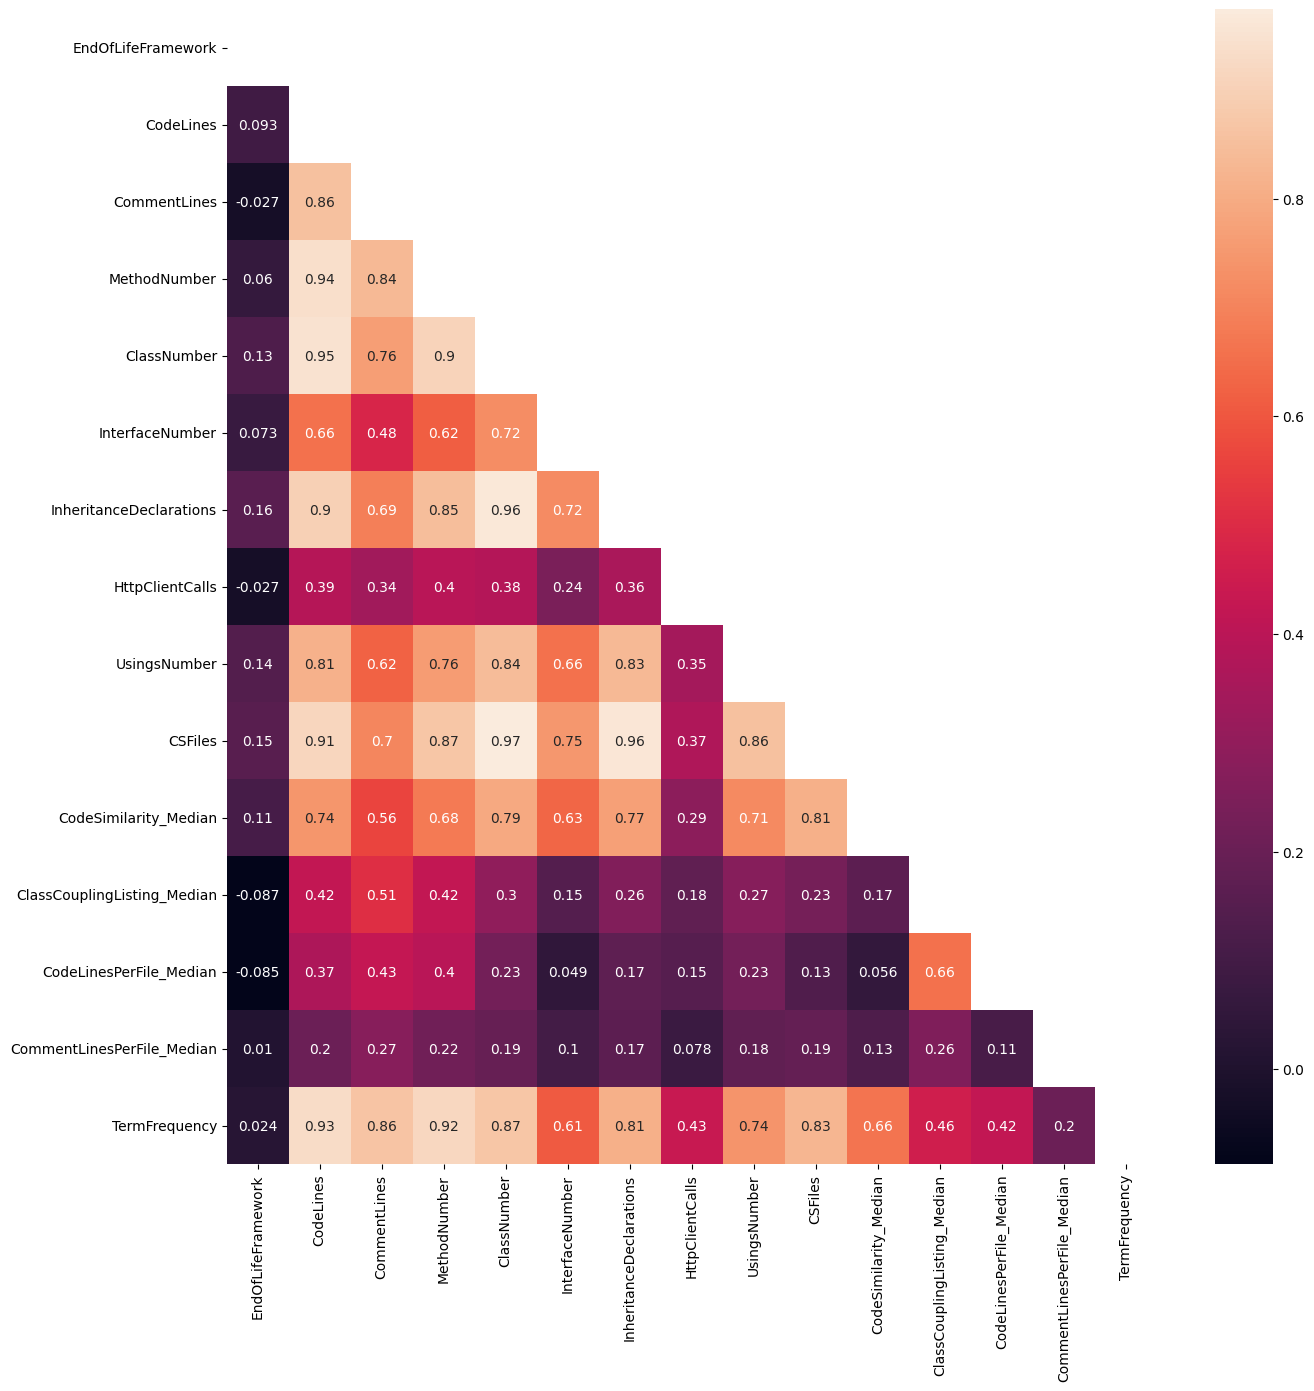

In [130]:
corr_m = dfcopy.corr()

mask = np.triu(corr_m)

plt.figure(figsize=(15,15))

sns.heatmap(corr_m, annot=True, mask=mask)
plt.show()

Remove high correlation from sns

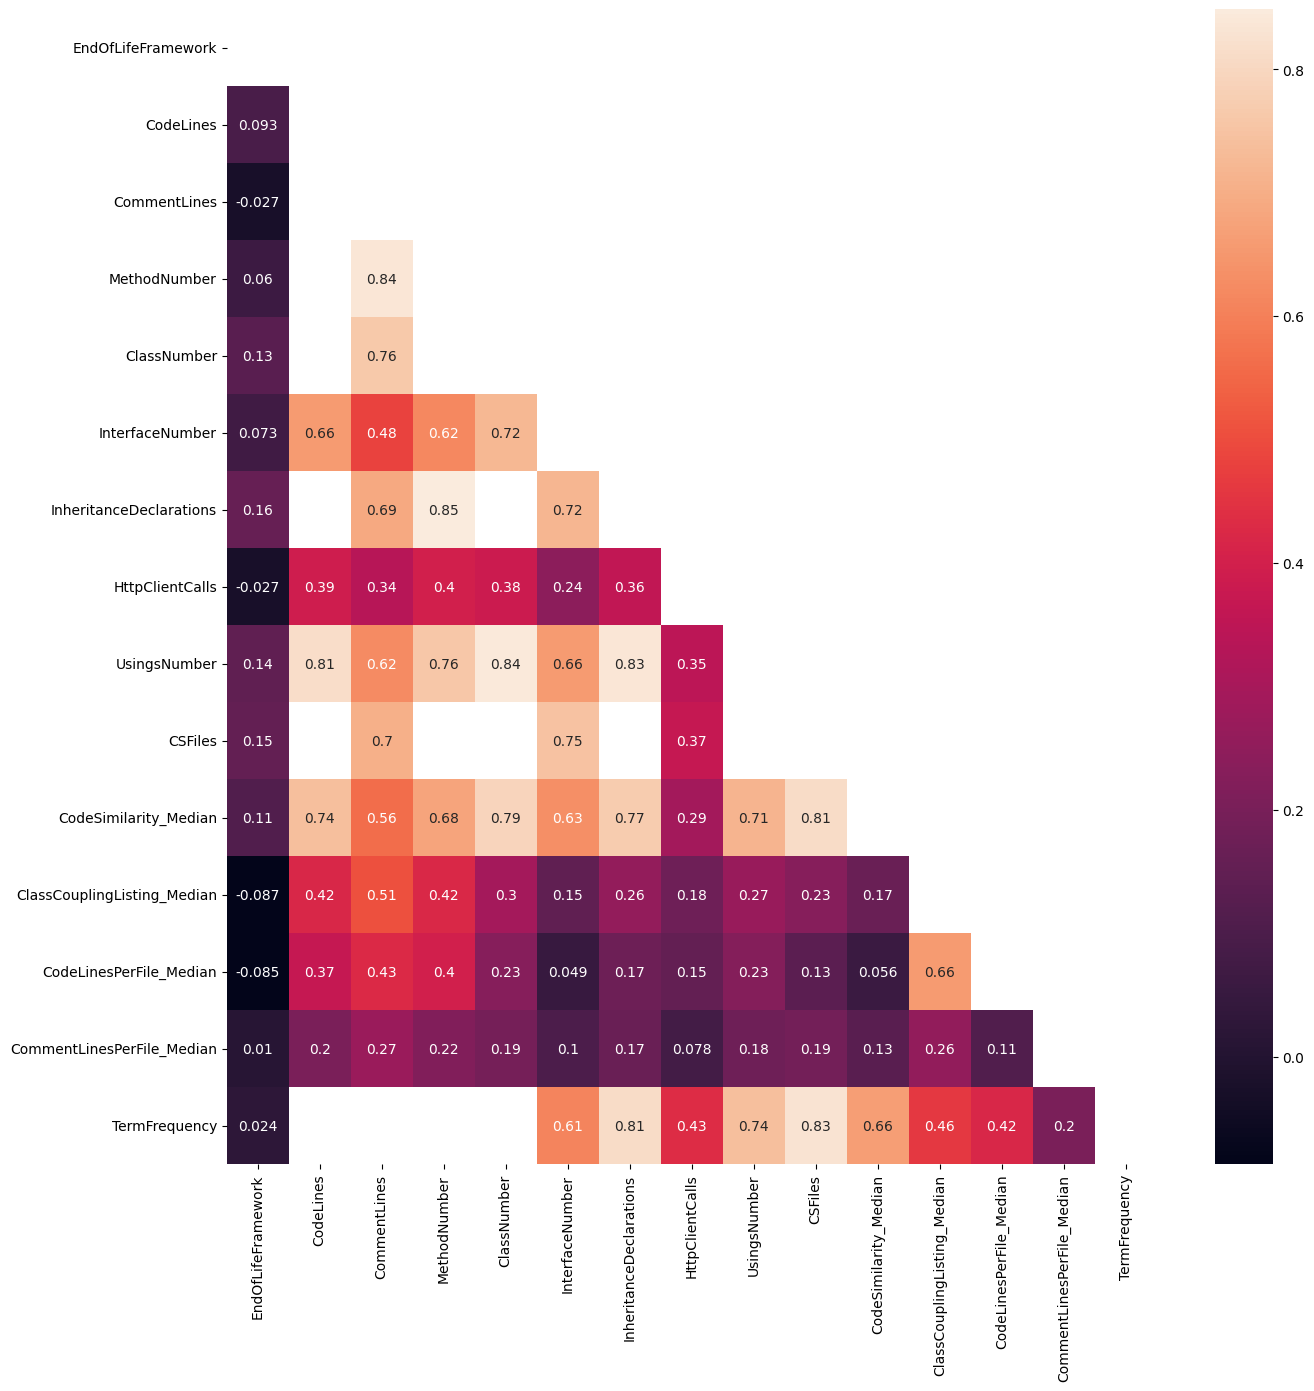

In [131]:
corr = (corr_m[(corr_m < 0.85)].dropna(thresh=2).dropna(thresh=2, axis=1))
mask = np.triu(corr)

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

# Model training

Testing different clustering models to investigate each result

# PCA


Creating PCA for dimensionality reduction

Ended up having a good variance ratio

In [132]:
knn_df = smoothed_signal_knn

In [133]:
X_s = knn_df
pcas = decomposition.PCA(n_components=2)
ress = pcas.fit_transform(X_s)
print(pcas.explained_variance_ratio_)
print('Explained variance: ', np.sum(pcas.explained_variance_ratio_))

[0.82301636 0.08991276]
Explained variance:  0.9129291166588251


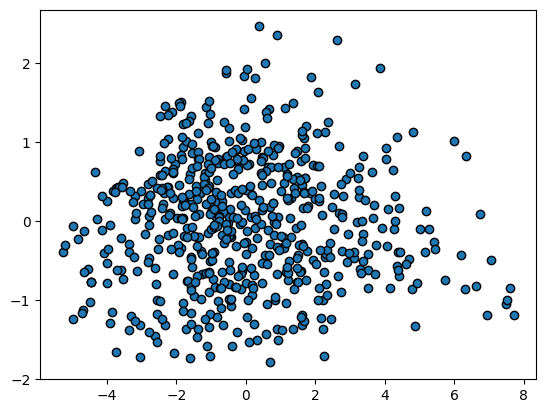

In [134]:
scatter = plt.scatter(ress[:, 0], ress[:, 1], edgecolors='black')
plt.show()

First clustering algorithm

# K Means

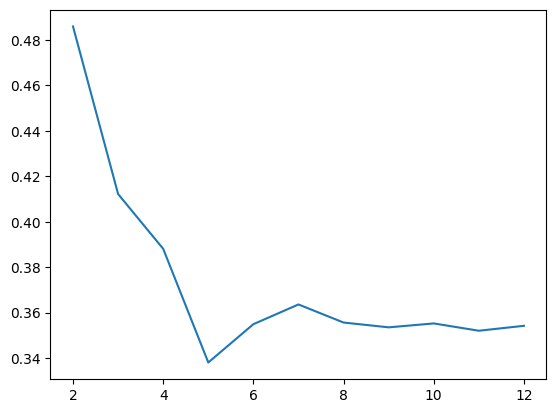

In [135]:
from sklearn.metrics import silhouette_score
silhouette = []
n_clusters = range(2,13)
for n in n_clusters:
    k_mean = cluster.KMeans(n_clusters=n, random_state=88, n_init=10)
    k_mean_clus = k_mean.fit_predict(ress)
    silhouette.append(silhouette_score(ress, k_mean.labels_))

plt.plot(n_clusters, silhouette)
plt.show()

Not so good silhouette meaning that there can be a slight overlap between cluster's boundaries

We tried to cluster with other number of clusters such as 3, 8, but 4 clusters were the most balanced ones

 It can be seen that the elbow lies at 4 

In [136]:
newpca = pcas.fit_transform(X_s)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1, tol=1e-9, max_iter=1000)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

Plotting the clusters

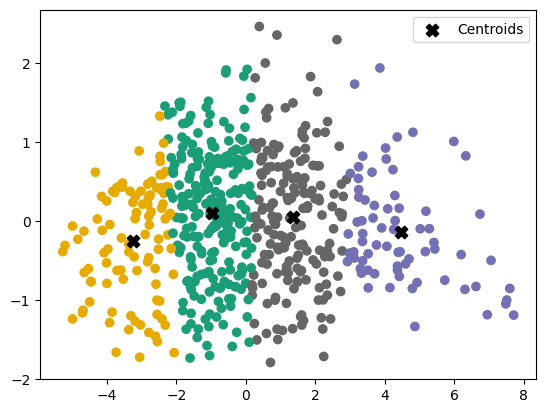

In [137]:
plt.scatter(newpca[:,0],newpca[:,1], c=means, cmap='Dark2')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color='k', marker='X', label='Centroids')
plt.legend()
plt.show()

Retrieving closest points to centroids

0 {'Centroid': (-0.9710467542186731, 0.10414324026572591), 'ClosestPoint': (-0.9949045151726001, 0.11435508376000178)}
1 {'Centroid': (4.47424156330875, -0.1339193168161033), 'ClosestPoint': (4.257418658329003, -0.10523129646126637)}
2 {'Centroid': (-3.251633234999936, -0.2470546676177611), 'ClosestPoint': (-3.3671664828142926, -0.29592495813571607)}
3 {'Centroid': (1.355539379204446, 0.050296623839379176), 'ClosestPoint': (1.2610605967748498, 0.03573955525105363)}


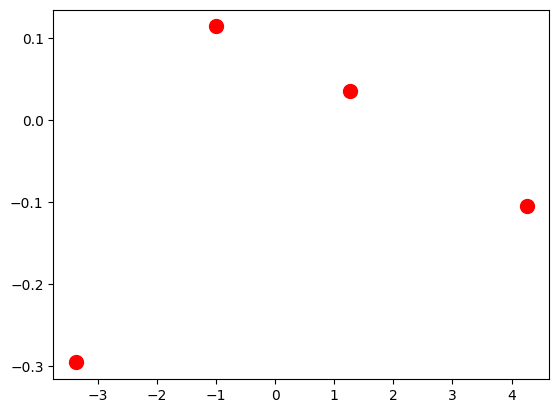

In [138]:
selected_points_in_clusters_km = {}

for i, centroid in enumerate(centroids):
    cluster_points = newpca[means == i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = cluster_points[closest_point_index]

    centroid_tuple = tuple(centroid)
    closest_point_tuple = tuple(closest_point)

    selected_points_in_clusters_km[i] = {'Centroid': centroid_tuple, 'ClosestPoint': closest_point_tuple}
    plt.scatter(closest_point[0], closest_point[1], s=100, color='red', marker='o', label=f'Closest Point to Centroid {i}')


for cluster, points in selected_points_in_clusters_km.items():
    print(f'{cluster} {points}')

Second clustering algorithm

# DBSCAN

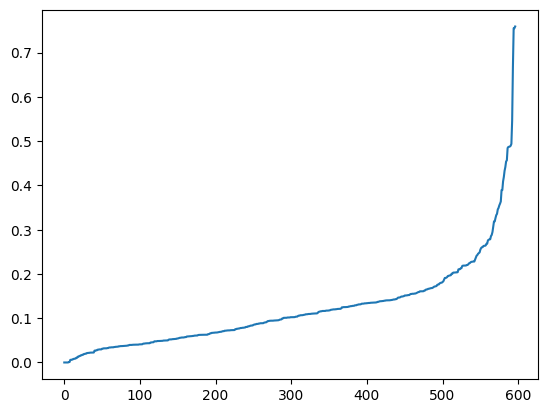

In [139]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(ress)
distances, indices = neighbors_fit.kneighbors(ress)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [140]:
dbscan=DBSCAN(eps = 0.25, min_samples = 17)
yhat = dbscan.fit_predict(ress)
clusters = np.unique(yhat)
len(clusters)

2

The number of clusters given by this algorithm did not prove to be sufficient

We tried different min_samples but the result had quite some noise which was not helpful for the model

## DBSCAN with noise

DBSCAN clusters are pretty noisy, which would mean that leaving aside the noise, would significantly reduce the sample 

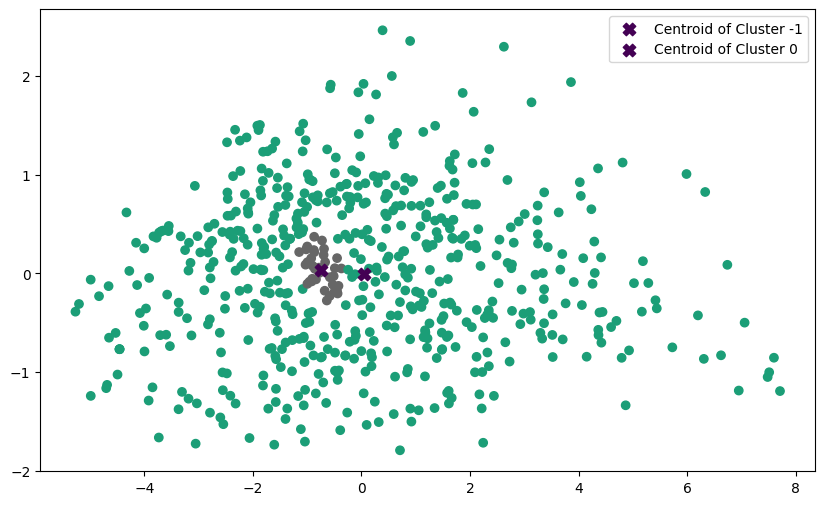

In [141]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(ress[:,0], ress[:,1] , c=yhat, cmap='Dark2')
plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    cluster_points = ress[yhat == cluster]
    centroid = np.mean(cluster_points, axis=0)
    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

## DBSCAN after filtering out the noise

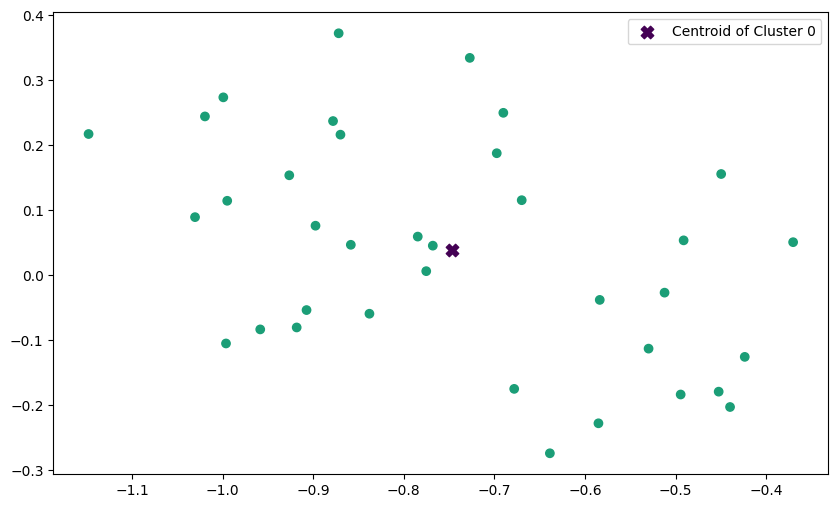

In [142]:
plt.figure(figsize=(10, 6))

filtered_points = ress[yhat != -1]
filtered_labels = yhat[yhat != -1]

scatter = plt.scatter(filtered_points[:, 0], filtered_points[:, 1], c=filtered_labels, cmap='Dark2')

plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    if cluster != -1:
        cluster_points = ress[yhat == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroid_color = plt.cm.viridis(cluster / len(clusters))

        plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                    label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

Third clustering algorithm

# Gausian Mixture Clustering

[0 1 2]


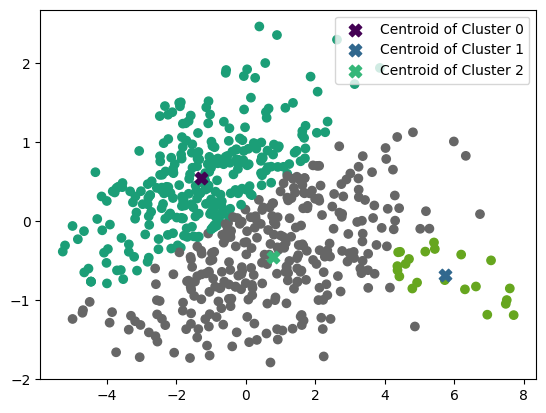

In [143]:
gaussian_mdl = GaussianMixture(n_components=3, random_state=seed, tol=1e-9, max_iter=1000, means_init=np.array([ress[seed], ress[2 * seed], ress[3 * seed]]))
gaussian_mdl.fit(ress)
gaussian_res = gaussian_mdl.fit_predict(ress)

clusters = np.unique(gaussian_res) # get the unique clusters

scatter = plt.scatter(ress[:,0], ress[:,1] , c=gaussian_res, cmap='Dark2')
print(clusters)

for cluster in clusters:
    cluster_points = ress[gaussian_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

It was decided not to use Gausian Mixture Clustering due to imbalanced clusters and the fact that the last cluster had small sample size

Fourth clustering algorithm

# Birch Clustering

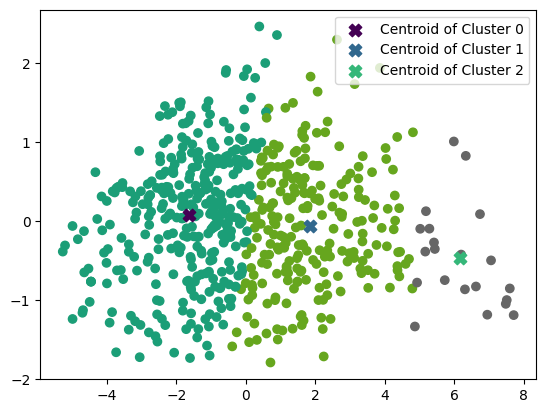

In [144]:
birch_model = Birch(branching_factor=50, n_clusters=3, threshold=1.75)
birch_model.fit(ress)
birch_res = birch_model.fit_predict(ress)

clusters = np.unique(birch_res) # get the clusters
scatter = plt.scatter(ress[:,0], ress[:,1] , c=birch_res, cmap='Dark2')


for cluster in clusters:
    cluster_points = ress[birch_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

The same idea with GMC, plus the fact that this algorithm is used for large datasets, which in our case is not applied


Fifth clustering algorithm

# Meanshift clustering

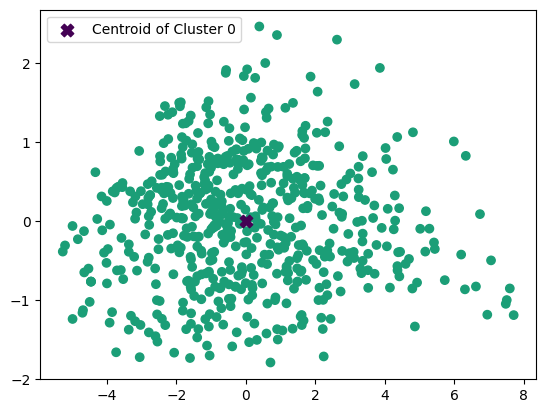

In [145]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
meanshit_ress = ms.fit_predict(ress)
labels = ms.labels_
clusters = np.unique(meanshit_ress)
centers = ms.cluster_centers_
scatter = plt.scatter(ress[:,0], ress[:,1] , c=labels, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

Meanshift clustering is not an appropriate clustering algorithm for this data set as it yields only one cluster which we assume it is due to the noise

Sixth clustering algorithm

# Bayesian Gaussian Mixture

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


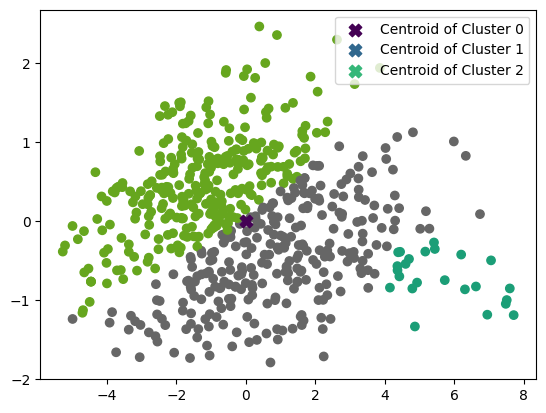

In [146]:
bgm = BayesianGaussianMixture(n_components=3, random_state=54)
bgm.fit(ress)
bgm_res = bgm.fit_predict(ress)
clusters = np.unique(bgm_res)

scatter = plt.scatter(ress[:,0], ress[:,1] , c=bgm_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

Similar to the Birch algorithm, with only a few differences, so we decided not to use this one as well

# Gausian Mixture Clustering centroids handling

 Extract points closest to centroids

In [147]:
clusters = np.unique(gaussian_res)

selected_points_in_clusters = {}

for cluster in clusters:
    cluster_indices = np.where(gaussian_res == cluster)[0]
    sorted_indices = np.argsort(cluster_indices)

    cluster_points = ress[cluster_indices[sorted_indices]]
    centroid = np.mean(cluster_points, axis=0)

    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Top closest points to the centroids
    k = 5
    closest_indices = np.argsort(distances)[:k]
    closest_points = cluster_points[closest_indices]

    selected_points_in_clusters[cluster] = closest_points

for cluster, points in selected_points_in_clusters.items():
    print(f'{cluster} {points}')

0 [[-1.19847544  0.55750556]
 [-1.19616923  0.46608974]
 [-1.17240332  0.51538962]
 [-1.17052992  0.60723007]
 [-1.44469783  0.44768391]]
1 [[ 5.72662679 -0.74934266]
 [ 5.44017097 -0.35431014]
 [ 5.41600849 -0.27173824]
 [ 6.1985865  -0.4252533 ]
 [ 6.30705128 -0.86615278]]
2 [[ 0.67424869 -0.42607952]
 [ 0.90805436 -0.33350275]
 [ 0.94190898 -0.36422245]
 [ 0.70904881 -0.29026766]
 [ 0.61190911 -0.54574262]]


Map points to rows and load them in a dataframe

In [148]:
original_rows = {}

for cluster, points in selected_points_in_clusters.items():
    print(points)
    original_indices = np.where(np.isin(ress, points).all(axis=1))[0]
    original_rows[cluster] = dataframe.iloc[original_indices]
    
for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

[[-1.19847544  0.55750556]
 [-1.19616923  0.46608974]
 [-1.17240332  0.51538962]
 [-1.17052992  0.60723007]
 [-1.44469783  0.44768391]]
[[ 5.72662679 -0.74934266]
 [ 5.44017097 -0.35431014]
 [ 5.41600849 -0.27173824]
 [ 6.1985865  -0.4252533 ]
 [ 6.30705128 -0.86615278]]
[[ 0.67424869 -0.42607952]
 [ 0.90805436 -0.33350275]
 [ 0.94190898 -0.36422245]
 [ 0.70904881 -0.29026766]
 [ 0.61190911 -0.54574262]]
0                                Project_ID  \
8    6379c58b-8ed4-4aa3-9da9-42e17b4c0bfa   
11   a27800c8-c740-4a6a-92c9-64a342b64872   
29   c19ffdfc-c841-447b-853c-31ce1f4a085b   
174  312120bb-ace8-4dac-8b53-f19f061128dd   
185  16db0554-d2f3-476b-85a7-a647df1ed1ef   

                                  Project_Name  EndOfLifeFramework  \
8                            aksharp_DDD.Light                  21   
11              alugili_ModernArchitectureShop                  26   
29                      ardalis_ddd-vet-sample                  22   
174  medalinouira_ASPNetCore-CleanArchi

In [149]:
gsm_clustered_df = pd.concat([df.assign(Cluster=cluster) for cluster, df in original_rows.items()])
gsm_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
8,6379c58b-8ed4-4aa3-9da9-42e17b4c0bfa,aksharp_DDD.Light,21,0,54,0,2,3178,487,118,...,44,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,234,"[11, 16, 1, 14, 8, 3, 7, 23, 3, 8, 6, 25, 13, ...","[7, 10, 6, 46, 7, 69, 7, 13, 11, 7, 16, 9, 10,...","[0, 0, 0, 0, 7, 1, 7, 0, 0, 7, 0, 0, 0, 0, 0, ...","[8.66, 6.51, 9.24, 98.7, 4.14, 98.89, 12.05, 1...",139,0
11,a27800c8-c740-4a6a-92c9-64a342b64872,alugili_ModernArchitectureShop,26,1,207,11,1,8692,407,127,...,138,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",22,1071,"[5, 2, 4, 2, 4, 4, 1, 13, 1, 0, 0, 4, 3, 1, 3,...","[20, 23, 15, 8, 7, 7, 9, 6, 9, 13, 18, 8, 8, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[70.36, 84.57, 75.78, 82.1, 33.83, 74.54, 43.7...",282,0
29,c19ffdfc-c841-447b-853c-31ce1f4a085b,ardalis_ddd-vet-sample,22,6,172,25,2,7494,1377,371,...,78,"[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,609,"[0, 6, 9, 2, 11, 5, 4, 0, 13, 2, 2, 10, 5, 5, ...","[10, 44, 37, 9, 73, 15, 37, 38, 15, 26, 44, 19...","[0, 1, 3, 0, 3, 17, 0, 0, 17, 0, 1, 0, 0, 3, 0...","[1.76, 1.79, 5.88, 91.19, 0.67, 5.03, 1.41, 1....",205,0
174,312120bb-ace8-4dac-8b53-f19f061128dd,medalinouira_ASPNetCore-CleanArchitecture,10,0,22,3,0,2108,475,71,...,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,214,"[8, 20, 31, 31, 34, 13, 7, 26, 7, 8, 8, 9, 18,...","[19, 83, 114, 113, 126, 8, 7, 12, 12, 10, 12, ...","[4, 6, 24, 24, 28, 4, 4, 4, 4, 4, 4, 7, 4, 6, ...","[10.71, 10.93, 11.0, 0.0, 0.02, 0.01, 9.35, 8....",66,0
185,16db0554-d2f3-476b-85a7-a647df1ed1ef,mmacneil_CleanAspNetCoreWebApi,5,1,14,1,0,1720,111,35,...,25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,167,"[9, 12, 11, 5, 1, 3, 37, 9, 8, 3, 0, 0, 2, 0, ...","[97, 29, 40, 39, 36, 22, 126, 30, 30, 12, 9, 1...","[12, 8, 7, 9, 9, 0, 16, 2, 2, 1, 0, 0, 0, 0, 0...","[45.03, 9.62, 48.83, 30.67, 25.37, 9.52, 7.35,...",53,0
371,56a9dc71-adef-47c2-9c10-475a0f8d4458,Dotnet-Boxed_Templates,1,1,86,4,0,6757,1003,151,...,71,"[0, 28, 0, 0, 4, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0,...",48,484,"[5, 43, 6, 11, 8, 3, 26, 17, 37, 12, 4, 9, 16,...","[13, 88, 13, 28, 60, 35, 111, 29, 150, 67, 19,...","[3, 12, 0, 15, 2, 3, 12, 8, 25, 8, 0, 0, 0, 0,...","[1.0, 5.8, 1.09, 0.3, 1.11, 0.92, 0.69, 0.68, ...",178,1
496,7ee6274f-4cff-4a94-ad4e-a3ee4d73c7bf,ONLYOFFICE_CommunityServer,19,610,35665,2240,530,680452,211030,19947,...,3828,"[0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,...",128,26849,"[23, 58, 35, 28, 22, 21, 103, 29, 29, 29, 25, ...","[52, 568, 242, 134, 15, 63, 32, 144, 109, 65, ...","[1, 3, 2, 1, 17, 1, 1, 165, 3, 1, 1, 1, 4, 13,...","[0.24, 4.69, 0.63, 0.67, 66.44, 2.0, 1.25, 5.6...",6217,1
503,8dc51220-5716-47a3-9a78-d5c1fecc8778,pauloanalista_Ionic3XApiEmAspNetCoreDDD,4,0,26,1,0,2142,176,46,...,29,"[0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,215,"[3, 31, 19, 19, 22, 10, 18, 11, 2, 0, 0, 0, 2,...","[23, 100, 68, 71, 94, 19, 70, 51, 15, 9, 7, 8,...","[0, 21, 0, 0, 1, 18, 0, 6, 0, 0, 0, 0, 0, 0, 0...","[13.22, 13.35, 10.83, 4.14, 12.89, 2.23, 2.29,...",61,1
505,d9a38065-f69d-44bb-adc5-dcdc926c36ce,pirate-kiiiing_PersonalFinanceApp.Api,20,1,158,5,1,5386,1403,137,...,51,"[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,360,"[11, 3, 25, 5, 4, 17, 19, 12, 24, 30, 15, 6, 3...","[50, 17, 81, 39, 21, 85, 56, 46, 125, 162, 32,...","[0, 0, 11, 0, 0, 14, 12, 3, 14, 48, 12, 1, 4, ...","[0.38, 1.14, 3.35, 4.1, 0.76, 3.53, 7.36, 4.99...",132,1
507,fa2cdfe6-8495-4a9c-8b3b-e569ee4c8724,PomeloFoundation_Pomelo.EntityFrameworkCore.MySql,0,48,954,110,28,88267,8272,3835,...,592,"[0, 0, 0, 0, 0, 1288, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3232,"[21, 18, 18, 29, 10, 37, 6, 12, 18, 12, 14, 17...","[55, 24, 24, 222, 19, 100, 25, 19, 15, 17, 25,...","[38,

In [150]:
gsm_clustered_df = combine_term_frequency(gsm_clustered_df)

In [151]:
columns_to_plot = ['Project_Name', 'CodeLines','CommentLines', 'MethodNumber','UsingsNumber', 'ClassNumber','TermFrequency','CSFiles' ,'EndOfLifeFramework','Cluster']
gsm_clustered_df[columns_to_plot]

,Project_Name,CodeLines,CommentLines,MethodNumber,UsingsNumber,ClassNumber,TermFrequency,CSFiles,EndOfLifeFramework,Cluster
8,aksharp_DDD.Light,3178,487,118,234,100,56,139,21,0
11,alugili_ModernArchitectureShop,8692,407,127,1071,274,220,282,26,0
29,ardalis_ddd-vet-sample,7494,1377,371,609,193,205,205,22,0
174,medalinouira_ASPNetCore-CleanArchitecture,2108,475,71,214,52,25,66,10,0
185,mmacneil_CleanAspNetCoreWebApi,1720,111,35,167,49,16,53,5,0
371,Dotnet-Boxed_Templates,6757,1003,151,484,178,91,178,1,1
496,ONLYOFFICE_CommunityServer,680452,211030,19947,26849,8155,39045,6217,19,1
503,pauloanalista_Ionic3XApiEmAspNetCoreDDD,2142,176,46,215,52,27,61,4,1
505,pirate-kiiiing_PersonalFinanceApp.Api,5386,1403,137,360,130,165,132,20,1
507,PomeloFoundation_Pomelo.EntityFrameworkCore.MySql,88267,8272,3835,3232,815,1140,561,0,1


# K Means centroids handling

Map points to rows

In [152]:
original_rows = {}

for cluster, points_info in selected_points_in_clusters_km.items():
    closest_point_tuple = points_info['ClosestPoint']
    distances = np.linalg.norm(ress - np.array(closest_point_tuple), axis=1)
    closest_index = np.argmin(distances)
    original_rows[cluster] = dataframe.iloc[closest_index]

for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

0 Project_ID                              626347cb-1707-499f-b408-75c1525c71e7
Project_Name                                      boraolim_CleanArchitecture
EndOfLifeFramework                                                         9
ForFrequency                                                               0
IfFrequency                                                              120
ForEachFrequency                                                           6
WhileFrequency                                                             1
CodeLines                                                              11451
CommentLines                                                             134
MethodNumber                                                              48
ClassNumber                                                              453
InterfaceNumber                                                           18
InheritanceDeclarations                                                  3

In [153]:
kmeans_clustered_df = pd.DataFrame(original_rows.values())
kmeans_clustered_df['Cluster'] = original_rows.keys()
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
46,626347cb-1707-499f-b408-75c1525c71e7,boraolim_CleanArchitecture,9,0,120,6,1,11451,134,48,...,399,"[0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,1936,"[17, 13, 17, 11, 17, 17, 11, 11, 17, 11, 11, 1...","[34, 30, 34, 28, 34, 34, 28, 28, 34, 28, 28, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.23, 1.51, 1.63, 1.24, 0.2, 0.08, 4.42, 1.96...",472,0
356,bca86ad7-7309-443c-8c5c-6ef120762032,DamianEdwards_RazorPagesSample,2,0,48,5,0,1900,42,35,...,32,"[0, 52, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0,...",0,263,"[3, 6, 3, 0, 3, 7, 6, 8, 4, 6, 2, 3, 26, 10, 2...","[24, 41, 16, 14, 16, 50, 38, 32, 19, 29, 19, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 3, 1, ...","[26.77, 15.34, 17.07, 14.99, 20.89, 13.41, 16....",43,1
33,c97e6802-bd55-45fa-a9eb-4f40b141054c,augustoclaro_LearnAngularDDD,7,0,6,3,0,1153,138,41,...,20,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,136,"[3, 12, 15, 6, 11, 9, 8, 7, 7, 5, 12, 2, 2, 2,...","[15, 21, 52, 75, 41, 69, 69, 15, 45, 39, 39, 3...","[16, 1, 0, 0, 0, 10, 0, 16, 0, 0, 0, 0, 17, 0,...","[44.62, 48.96, 3.11, 2.77, 1.68, 9.06, 24.28, ...",50,2
200,83eb8649-8eef-4afe-b65b-b80cada4b423,Novartus_Coffee-Shop-Management-System,0,0,24,0,0,1498,352,68,...,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,36,"[8, 5, 32, 30, 36, 36, 27, 28, 34, 34, 37, 37,...","[48, 25, 108, 177, 119, 150, 48, 99, 78, 105, ...","[4, 2, 7, 53, 12, 44, 6, 29, 9, 32, 10, 41, 1,...","[49.6, 5.63, 0.49, 6.15, 0.26, 8.33, 0.23, 8.1...",20,3


In [154]:
kmeans_clustered_df = combine_term_frequency(kmeans_clustered_df)

In [155]:
most_important_component_index = pcas.explained_variance_ratio_.argmax()
loadings = pcas.components_[most_important_component_index]
feature_names = dfcopy.columns
most_important_loadings = dict(zip(feature_names, loadings))
most_important_loadings_sorted = sorted(most_important_loadings.items(), key=lambda kv: kv[1], reverse=True)
for feature in most_important_loadings_sorted:
    print(f"{feature}")

('CodeLines', 0.7148620173641161)
('CommentLines', 0.4786371699082891)
('MethodNumber', 0.262547475473309)
('UsingsNumber', 0.23153617136200783)
('ClassNumber', 0.2121594130536336)
('CSFiles', 0.18442271319280745)
('InheritanceDeclarations', 0.1755490415936496)
('CodeSimilarity_Median', 0.10055534337815149)
('CodeLinesPerFile_Median', 0.07919299468863199)
('HttpClientCalls', 0.06572826835576008)
('ClassCouplingListing_Median', 0.054365774909133045)
('InterfaceNumber', 0.054309808378372244)
('TermFrequency', 0.027967777041874343)
('CommentLinesPerFile_Median', 0.008521612711543905)
('EndOfLifeFramework', 0.005885621348950654)


In [156]:
features = most_important_loadings_sorted[:5]
features
columns_to_plot = ['CodeLines','CommentLines', 'MethodNumber','UsingsNumber', 'ClassNumber','TermFrequency','CSFiles','Cluster']

In [157]:
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
46,626347cb-1707-499f-b408-75c1525c71e7,boraolim_CleanArchitecture,9,11451,134,48,453,18,399,"[0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,1936,"[17, 13, 17, 11, 17, 17, 11, 11, 17, 11, 11, 1...","[34, 30, 34, 28, 34, 34, 28, 28, 34, 28, 28, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.23, 1.51, 1.63, 1.24, 0.2, 0.08, 4.42, 1.96...",472,0,127
356,bca86ad7-7309-443c-8c5c-6ef120762032,DamianEdwards_RazorPagesSample,2,1900,42,35,41,2,32,"[0, 52, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0,...",0,263,"[3, 6, 3, 0, 3, 7, 6, 8, 4, 6, 2, 3, 26, 10, 2...","[24, 41, 16, 14, 16, 50, 38, 32, 19, 29, 19, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 3, 1, ...","[26.77, 15.34, 17.07, 14.99, 20.89, 13.41, 16....",43,1,53
33,c97e6802-bd55-45fa-a9eb-4f40b141054c,augustoclaro_LearnAngularDDD,7,1153,138,41,28,1,20,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,136,"[3, 12, 15, 6, 11, 9, 8, 7, 7, 5, 12, 2, 2, 2,...","[15, 21, 52, 75, 41, 69, 69, 15, 45, 39, 39, 3...","[16, 1, 0, 0, 0, 10, 0, 16, 0, 0, 0, 0, 17, 0,...","[44.62, 48.96, 3.11, 2.77, 1.68, 9.06, 24.28, ...",50,2,9
200,83eb8649-8eef-4afe-b65b-b80cada4b423,Novartus_Coffee-Shop-Management-System,0,1498,352,68,21,0,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,36,"[8, 5, 32, 30, 36, 36, 27, 28, 34, 34, 37, 37,...","[48, 25, 108, 177, 119, 150, 48, 99, 78, 105, ...","[4, 2, 7, 53, 12, 44, 6, 29, 9, 32, 10, 41, 1,...","[49.6, 5.63, 0.49, 6.15, 0.26, 8.33, 0.23, 8.1...",20,3,24


In [158]:
kmeans_clustered_df[columns_to_plot]

,CodeLines,CommentLines,MethodNumber,UsingsNumber,ClassNumber,TermFrequency,CSFiles,Cluster
46,11451,134,48,1936,453,127,472,0
356,1900,42,35,263,41,53,43,1
33,1153,138,41,136,28,9,50,2
200,1498,352,68,36,21,24,20,3


Trying a supervised learning model by using the cluster labels, but proved to be fruitless

In [159]:
gaussian_df = dfcopy
gaussian_df['Cluster_Labels'] = gaussian_res
gaussian_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,12,7,5,4,2,2,2,4,3,3,3,6,1,2,0
1,3,6,2,3,3,1,2,1,4,3,2,2,5,1,1,0
2,2,6,3,2,3,1,3,2,4,3,2,3,5,1,1,0
3,1,9,4,3,3,2,3,1,5,4,4,2,5,1,1,0
4,2,6,1,2,2,1,2,2,3,3,3,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,10,4,5,4,2,3,1,4,4,3,2,5,1,1,2
596,1,5,3,2,2,1,2,1,2,2,2,3,4,1,1,0
597,3,5,2,2,2,1,2,1,3,2,3,2,4,1,1,0
598,2,4,2,2,1,1,1,1,2,1,3,3,7,1,1,0


## Manually labeling the projects from KMeans output

In [160]:
kmeans_clustered_df
labels = [1, 2, 1, 0, 1, 3, 0]

clusters_nr = np.arange(7)
label_to_cluster_mapping = dict(zip(clusters_nr, labels))

means = means.reshape(-1, 1)

test = np.concatenate([dfcopy, means], axis=1)
result_df = pd.DataFrame(test, columns=list(dfcopy.columns) + ['Means'])

for key, val in label_to_cluster_mapping.items():
    result_df.loc[result_df['Means'] == key, 'Label'] = val


In [161]:
result_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Means,Label
0,1,12,7,5,4,2,2,2,4,3,3,3,6,1,2,0,0,1
1,3,6,2,3,3,1,2,1,4,3,2,2,5,1,1,0,0,1
2,2,6,3,2,3,1,3,2,4,3,2,3,5,1,1,0,0,1
3,1,9,4,3,3,2,3,1,5,4,4,2,5,1,1,0,0,1
4,2,6,1,2,2,1,2,2,3,3,3,2,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,1,10,4,5,4,2,3,1,4,4,3,2,5,1,1,2,0,1
593,1,5,3,2,2,1,2,1,2,2,2,3,4,1,1,0,2,1
594,3,5,2,2,2,1,2,1,3,2,3,2,4,1,1,0,2,1
595,2,4,2,2,1,1,1,1,2,1,3,3,7,1,1,0,2,1


In [162]:
label_to_cluster_mapping

{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 3, 6: 0}

# Other supervised learning algorithms

In this section we will try to see the performance of other supervised learning algorithms. 

For this the target will be the cluster labels created in the aftermath of clustering the data after preprocessing. 

The data used for prediction is going to be the same data that was used for preprocessing. 

The purpose of this experiment is to see whether any learning algorithms are able to accurately predict the correct cluster label based on existing data, without having to have the data go through KnnSmoothing or PCA. 

In [163]:
target = result_df['Cluster_Labels']
new_df_copy = result_df.drop(['Means', 'Label', 'Cluster_Labels'], axis=1)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X_trainval, X_test, y_trainval, y_test = train_test_split(new_df_copy, target,stratify=target, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=11)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))
parameters = {'n_neighbors': range(1,43),'p':range(1,5),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True, refit=True,n_jobs=-1)
grid_search.fit(X_train.values, y_train.values)
print("Test score: {:.2f}".format(grid_search.score(X_test.values, y_test.values)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))

print("Best estimator: {}".format(grid_search.best_estimator_))

Size of training set:335
Size of validation set:112
Size of test set:150
Test score: 0.67
Best parameter: {'algorithm': 'auto', 'n_neighbors': 23, 'p': 4, 'weights': 'uniform'}
Best cross-validation score: 0.6686567164179105
Best estimator: KNeighborsClassifier(n_neighbors=23, p=4)


### Gaussian Naive Bayes

Gaussian Naive Bayes seems to not be a good fit for this model, as this accuracy is subpar.

In [165]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_trainval, y_trainval)
nb.score(X_test,y_test)

0.5066666666666667

In [166]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier

parameters = {'criterion':['gini','entropy','log_loss'],'max_features':['sqrt', 'log2'],'max_depth':range(2,15),'min_samples_split':range(2,6)}
randomForest = GridSearchCV(RandomForestClassifier(n_estimators=110),parameters,n_jobs=7)
randomForest.fit(X_train, y_train)
print("Train score: {:.4f}".format(randomForest.score(X_train.values, y_train.values)))
print("Test score: {:.4f}".format(randomForest.score(X_test.values, y_test.values)))
print("Best parameter: {}".format(randomForest.best_params_))
print("Best cross-validation score: {}".format(randomForest.best_score_))
print("Best estimator: {}".format(randomForest.best_estimator_))

Train score: 0.8090
Test score: 0.6933
Best parameter: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2}
Best cross-validation score: 0.6776119402985075
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=110)


c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Saving the training model
This saves the trained model and the fitted pca into a pickle file that can then be loaded into the main system and used.

An extra cell was placed before them to prevent the execution of the cells once the final model has been loaded. This will allow for saving the model once and then reruning the data exploration cells if necessary 

In [167]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [173]:
model_pkl_file = "technical_debt_model.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(kmeans, file)

In [171]:
pca_pkl_file = "pca.pkl"
with open(pca_pkl_file, 'wb') as file:  
    pickle.dump(pcas, file)